In [5]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('reshape2')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
#source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
library(scales)
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [9]:
launch <- function(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab){
    number_of_chains <- chains
    chain_list <- vector('list', number_of_chains)
    hdp <- initialise_hdp_yanis(data = data,hh=base_dist,alphaa = aa,alphab= ab)


    for (i in 1:number_of_chains) {
        seed <- i * 100
        print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))

        # run single hdp chain
        chain_list[[i]] <- activate_and_run_hdp(hdp,
                                                initcc = initial_clusters,
                                                burnin = burn,
                                                n      = posterior_samples,
                                                space  = 20,
                                                seed   = seed)
        print_and_flush('\n')
    }

    multi_output <- hdp_multi_chain(chain_list)
    print(multi_output)
}

In [10]:
df_to_recluster <- read.table("df_to_recluster.tsv")
dim(df_to_recluster)

[1] 974 152

In [11]:
num_cols = ncol(df_to_recluster[colSums(df_to_recluster) > 0])  ## keep only column that have at least a mutation
num_cols
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

binomial <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],bin))
gaussian <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],normal))
pois <- as.numeric(unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],poisson)))
unif <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],equally))

[1] 132

Initialise HDP on a 974 x 132 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 975 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

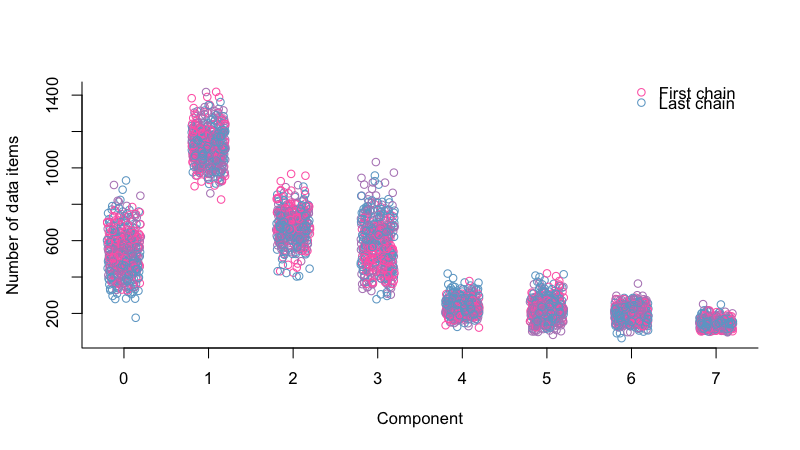

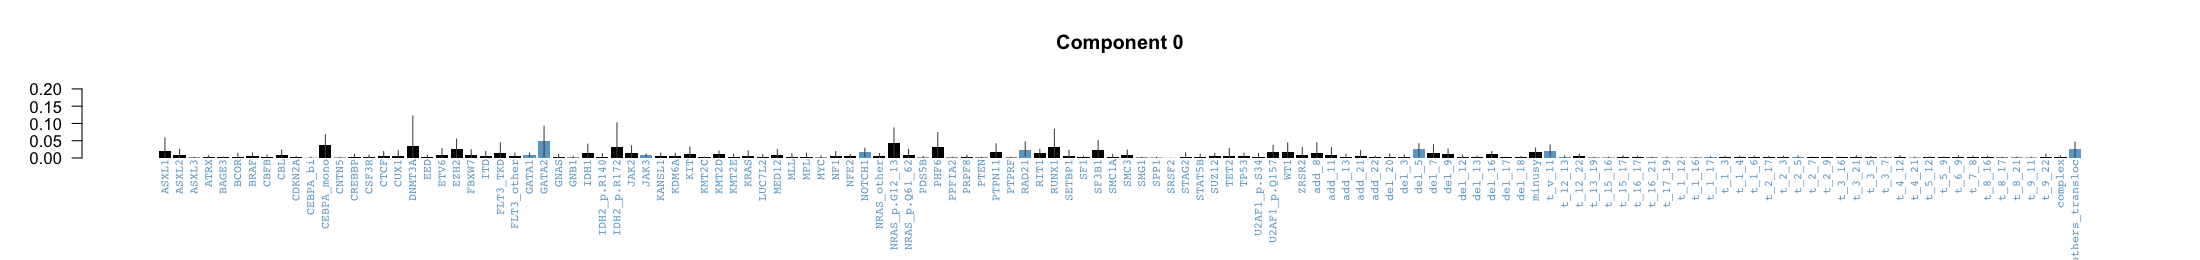

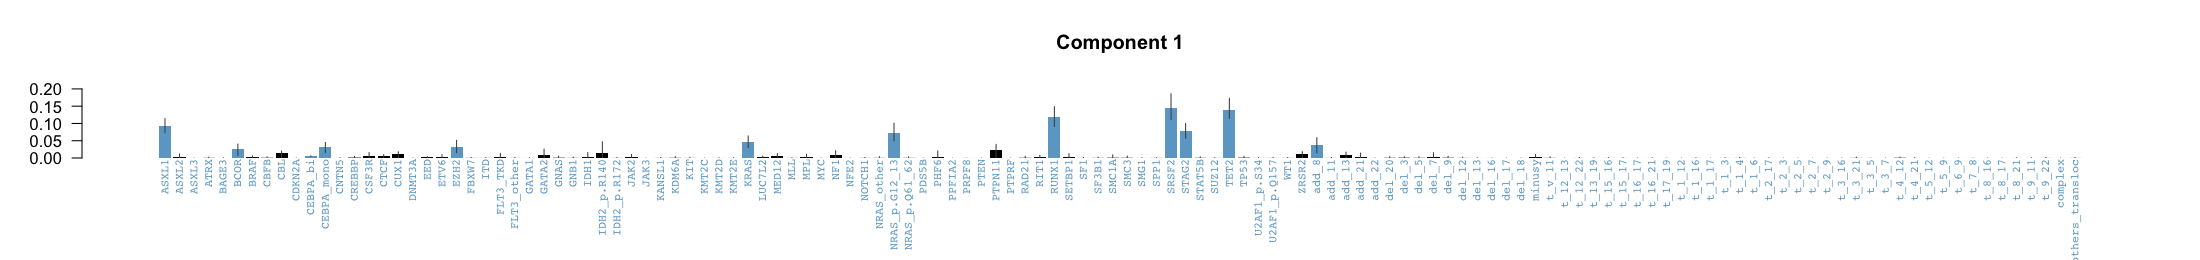

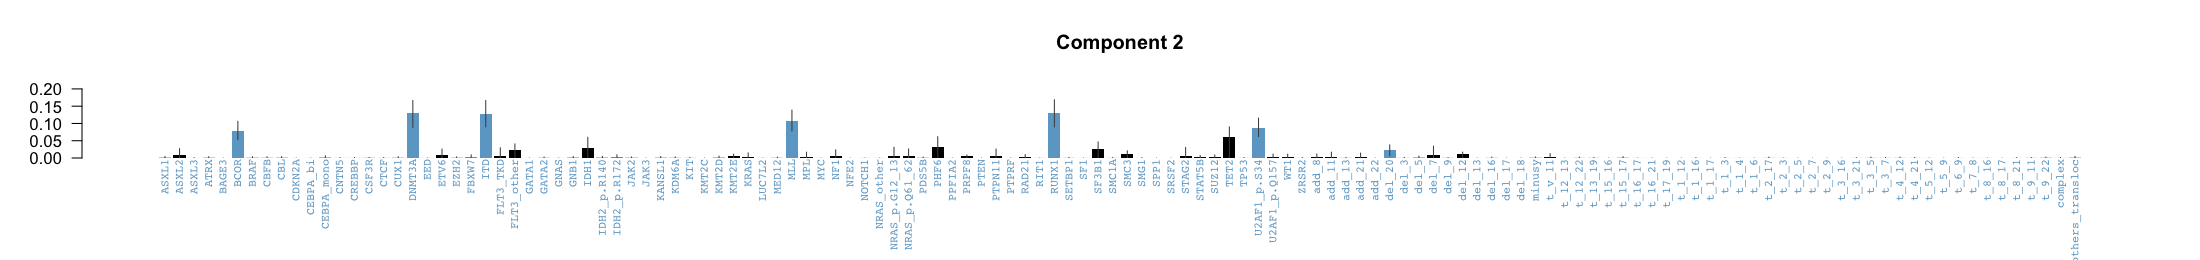

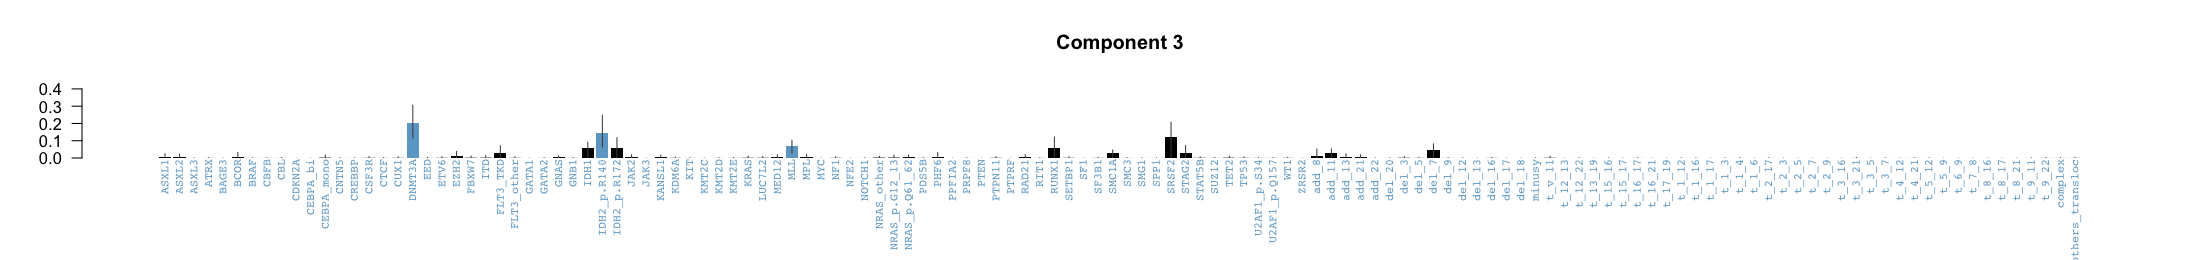

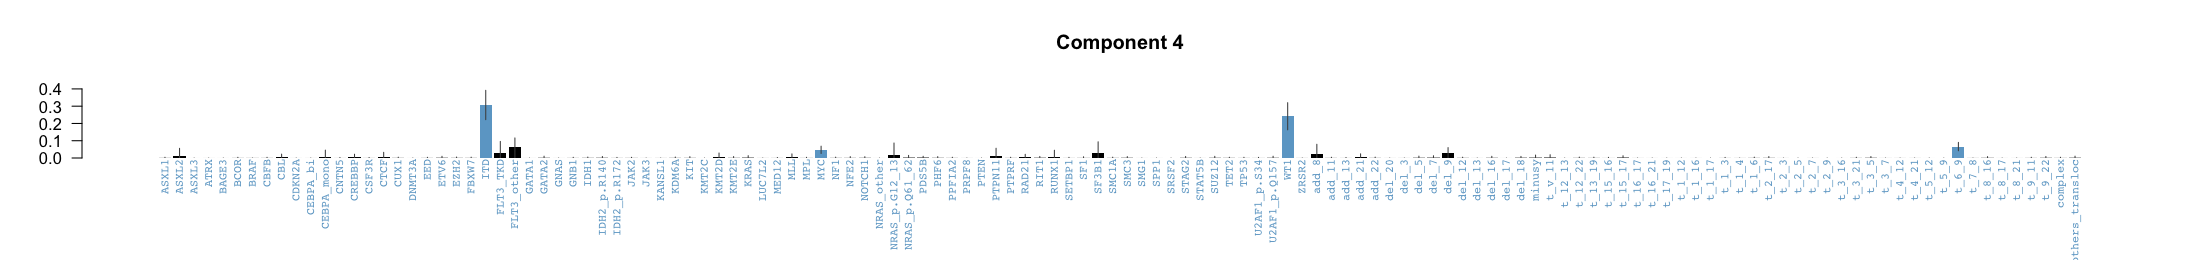

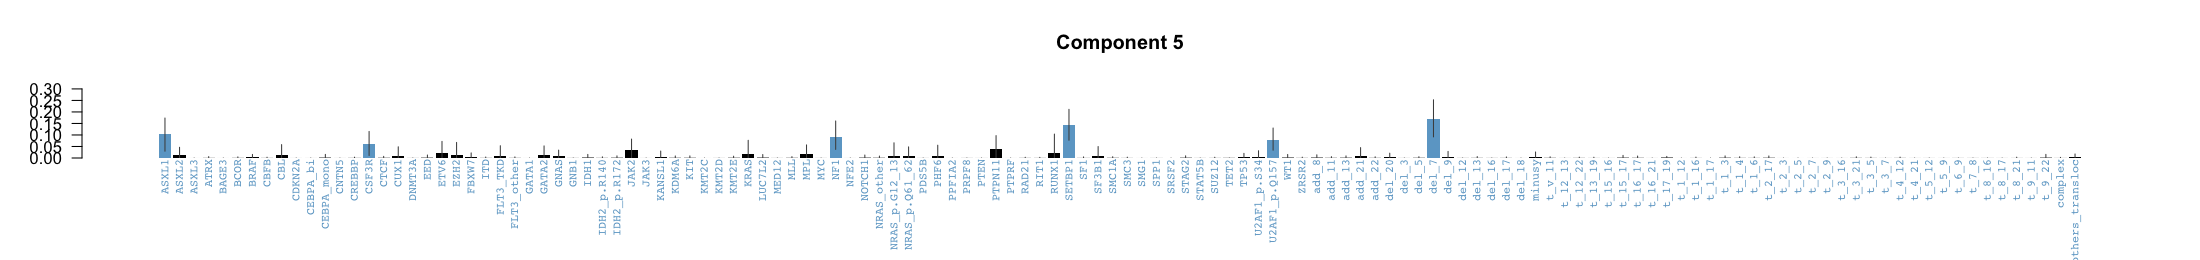

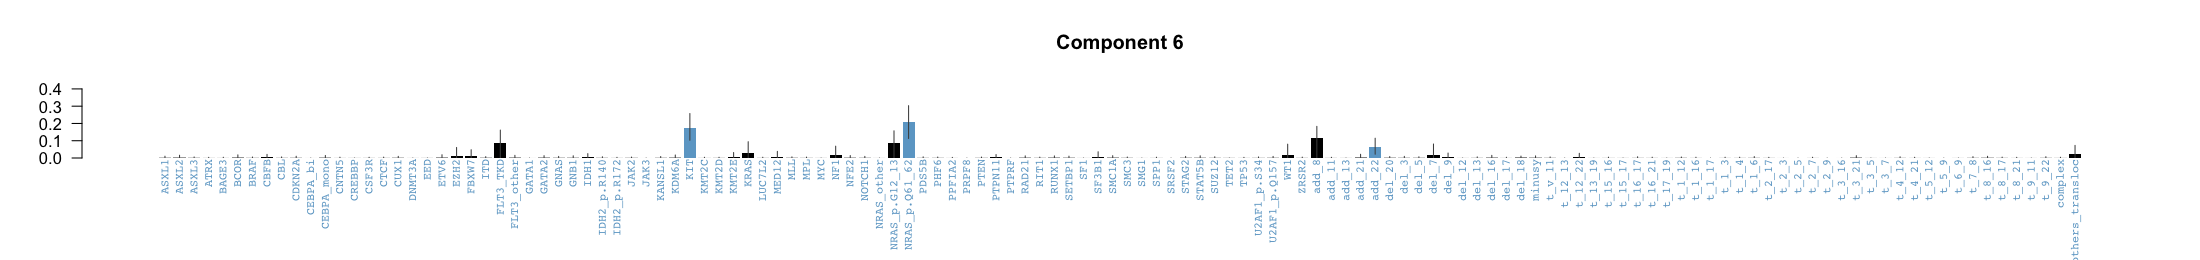

Number of components: 7
Number of NA rows   : 3


,values,count,freq
2,1,304,31.211498973306
3,2,177,18.1724845995893
4,3,160,16.4271047227926
1,0,124,12.7310061601643
5,4,71,7.28952772073922
7,6,67,6.8788501026694
6,5,37,3.79876796714579
8,7,31,3.18275154004107
9,NaN,3,0.308008213552361
11,-- total --,974,100%


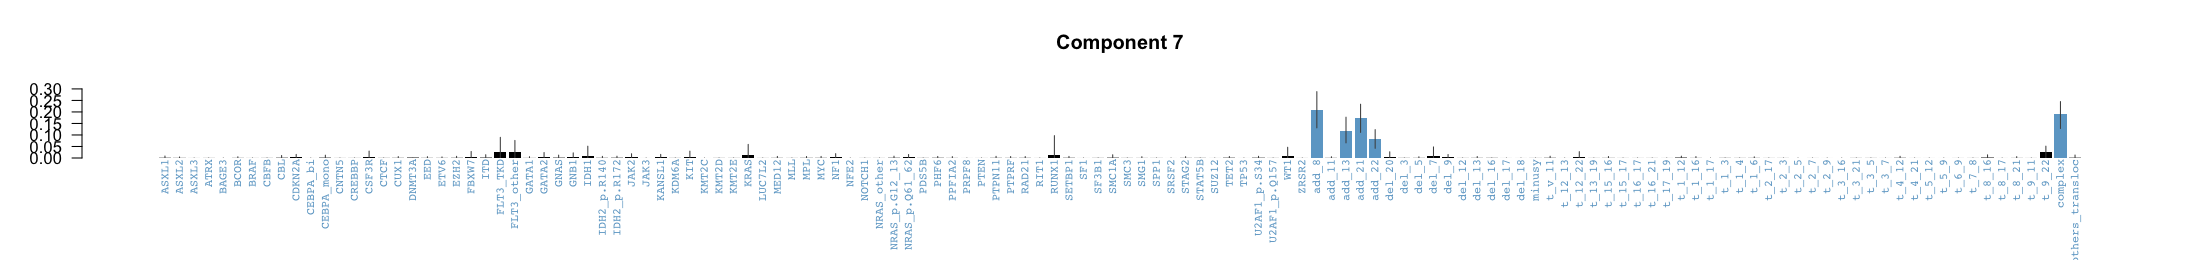

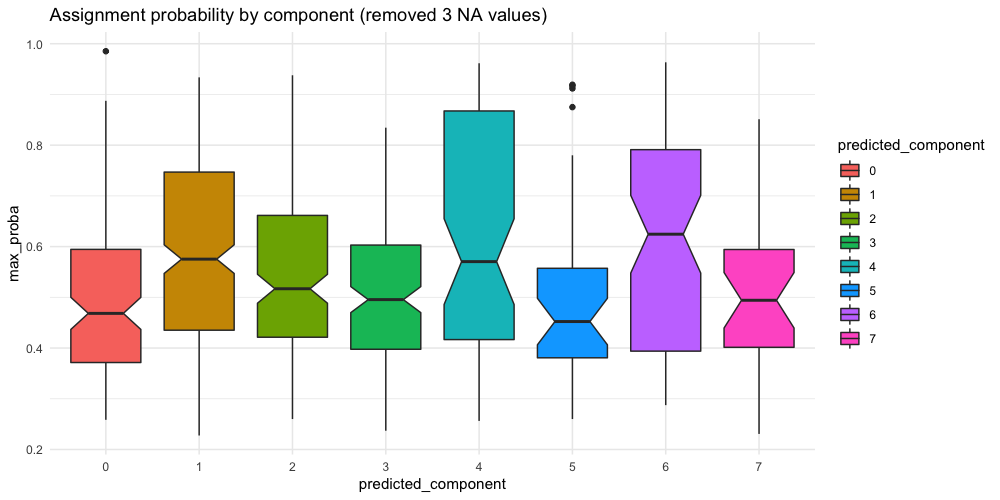

In [27]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 15
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")

dd_predicted_recluster_7 <- get_prediction_result_dataframe(multi_output_recluster_7, df_to_recluster[colSums(df_to_recluster) > 0])
get_table(dd_predicted_recluster_7[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_recluster_7)

Initialise HDP on a 974 x 132 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 975 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

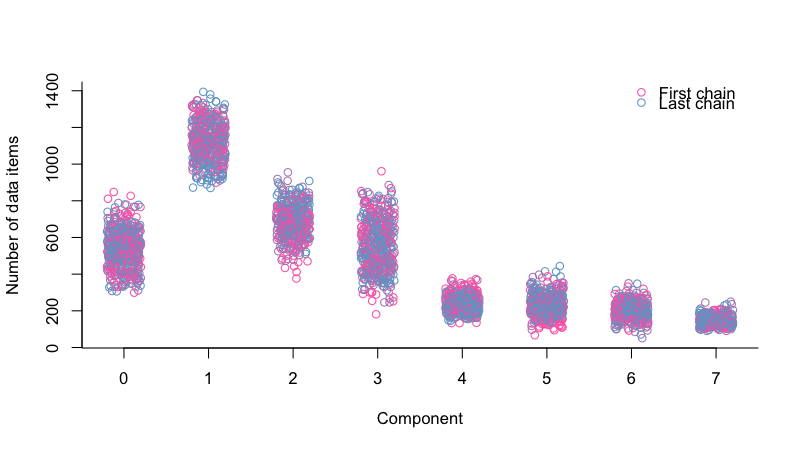

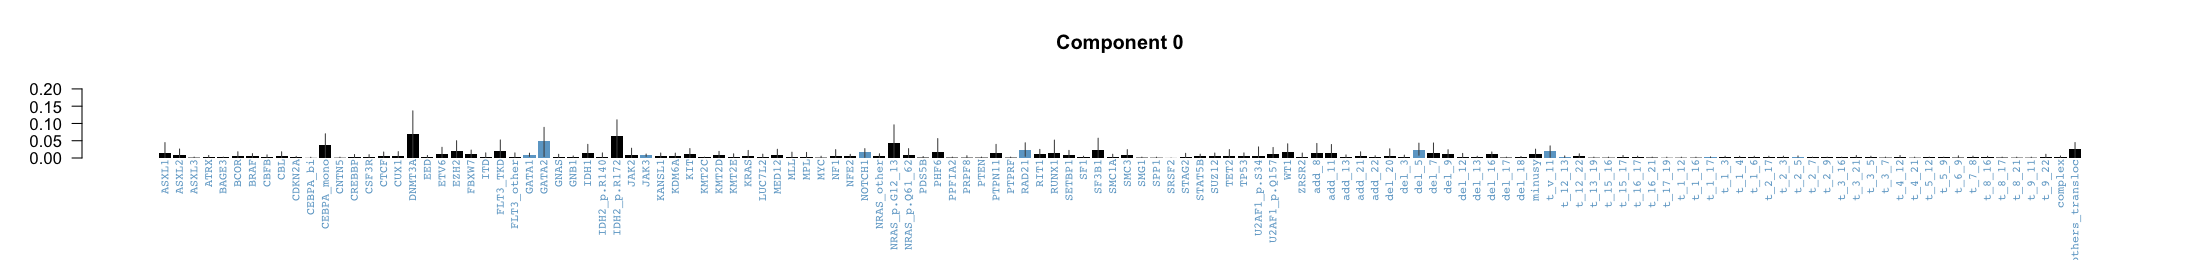

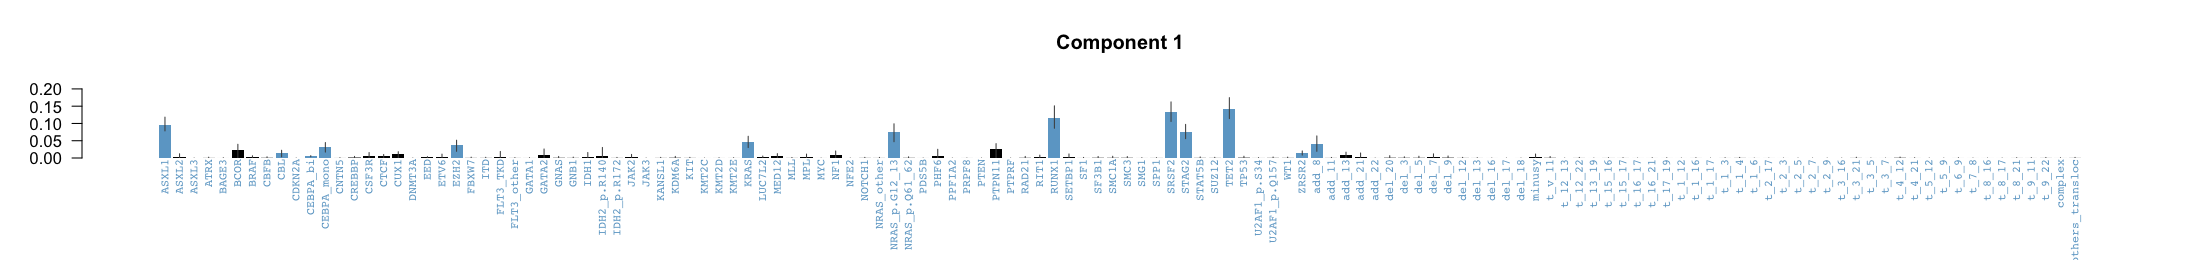

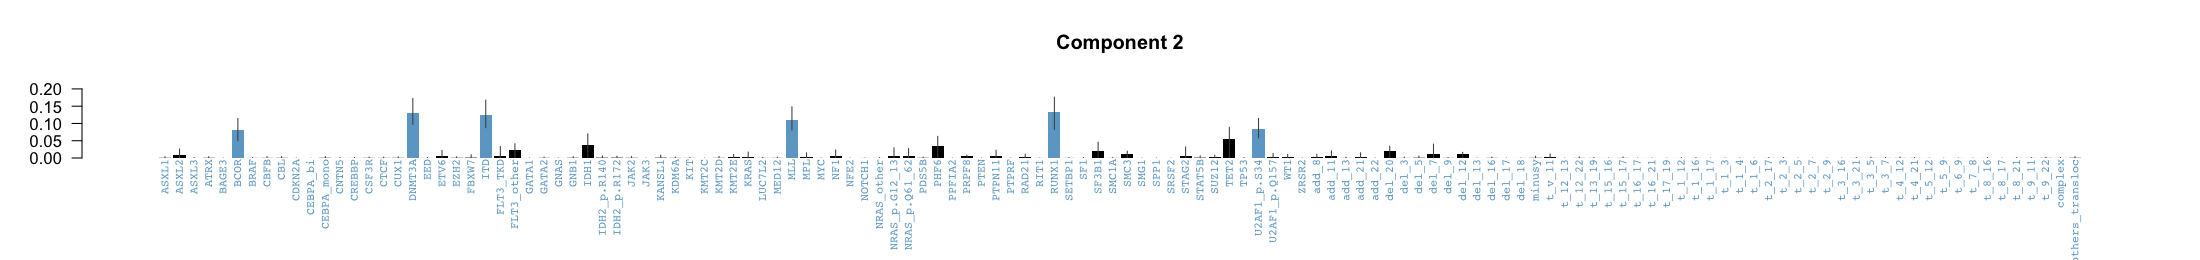

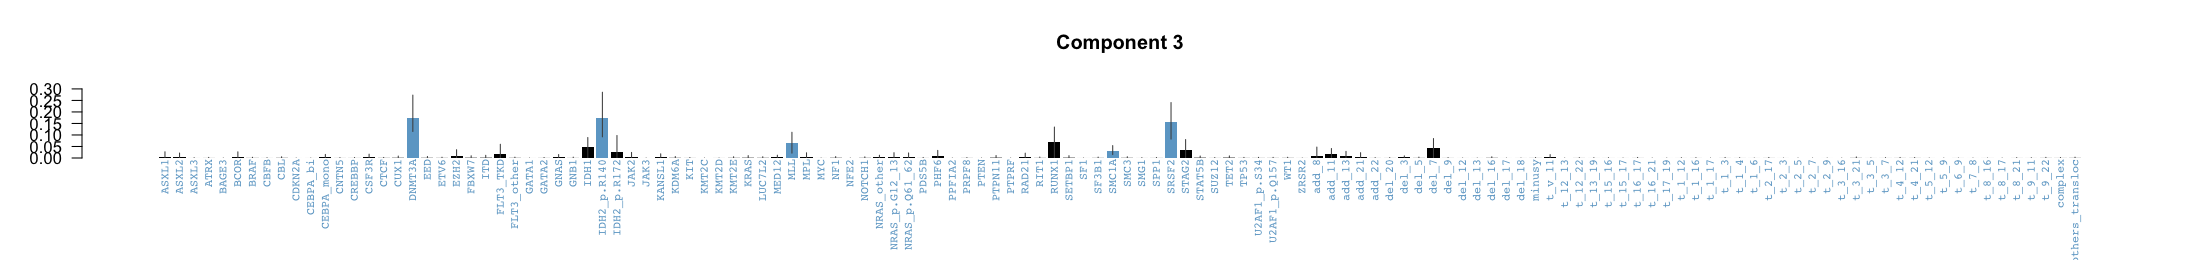

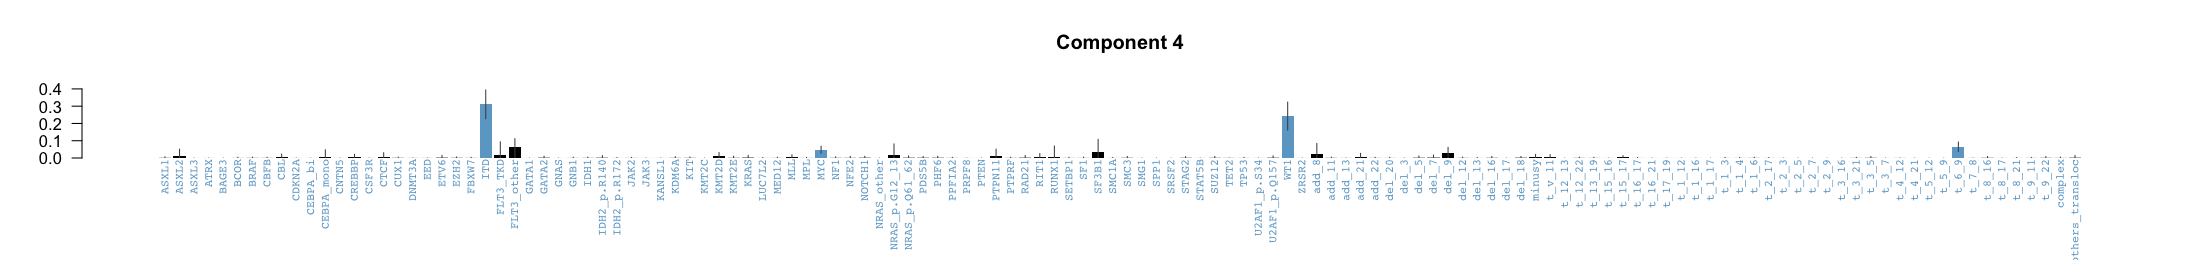

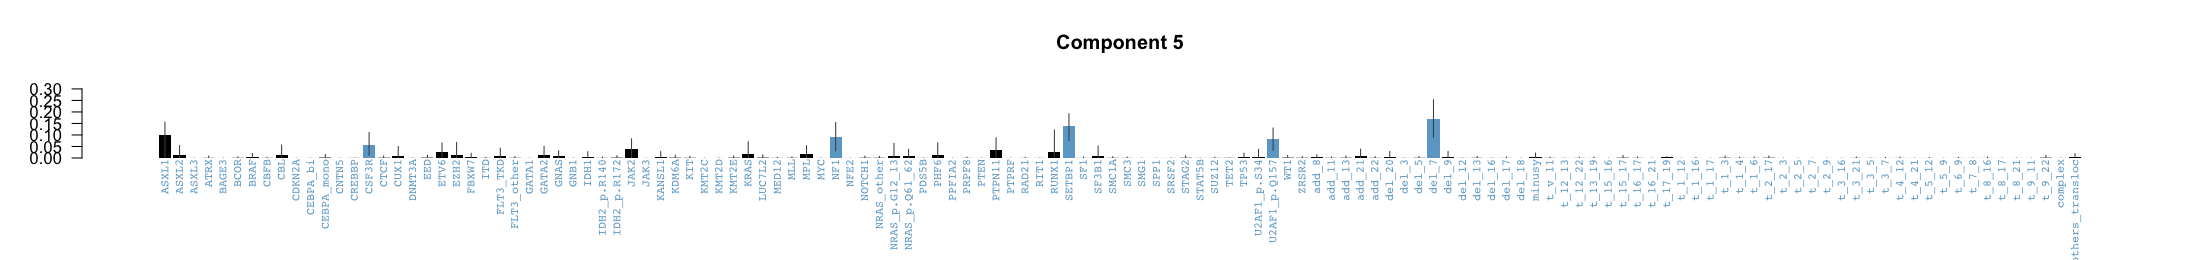

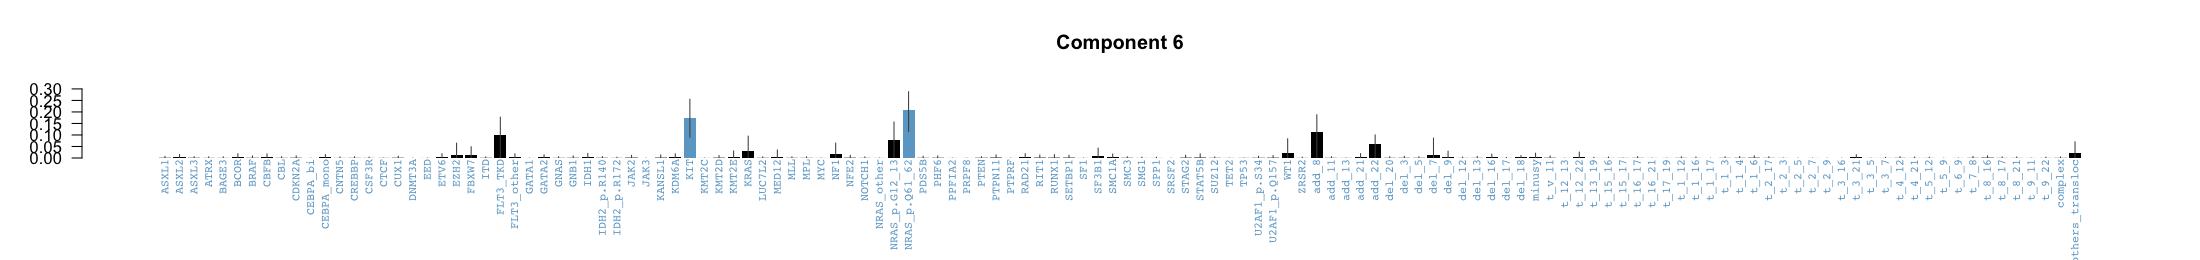

Number of components: 7
Number of NA rows   : 3


,values,count,freq
2,1,303,31.1088295687885
3,2,186,19.0965092402464
1,0,154,15.8110882956879
4,3,118,12.1149897330595
5,4,72,7.39219712525667
7,6,70,7.18685831622177
6,5,38,3.90143737166324
8,7,30,3.08008213552361
9,NaN,3,0.308008213552361
11,-- total --,974,100%


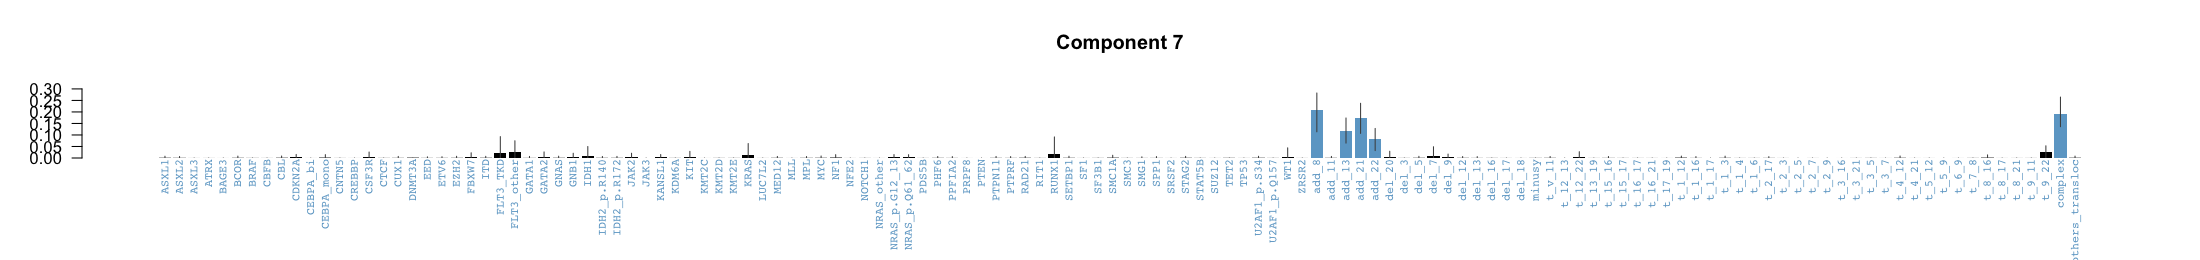

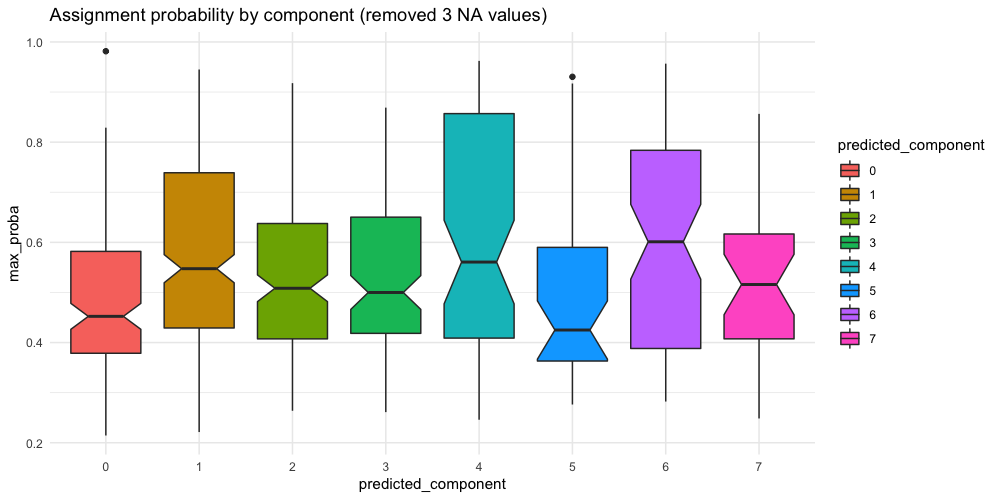

In [15]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 15
burn <- 5000
chains <- 3
base_dist <-gaussian
aa <- 2
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")
dd_predicted_recluster_7 <- get_prediction_result_dataframe(multi_output_recluster_7, df_to_recluster[colSums(df_to_recluster) > 0])
get_table(dd_predicted_recluster_7[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_recluster_7)

Initialise HDP on a 974 x 132 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 975 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

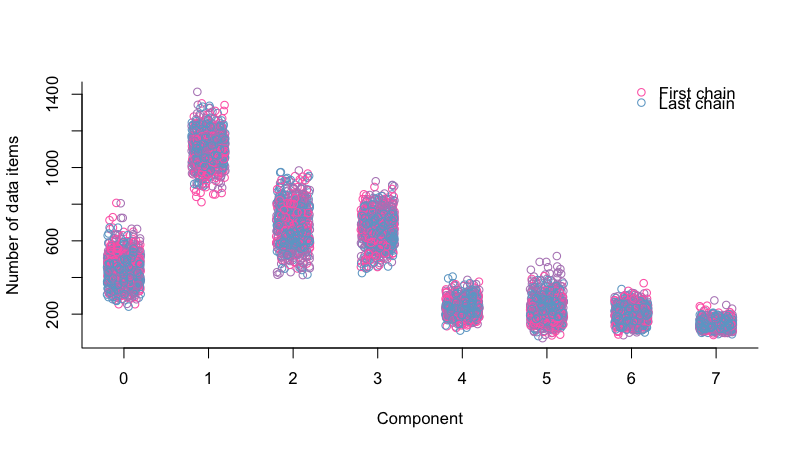

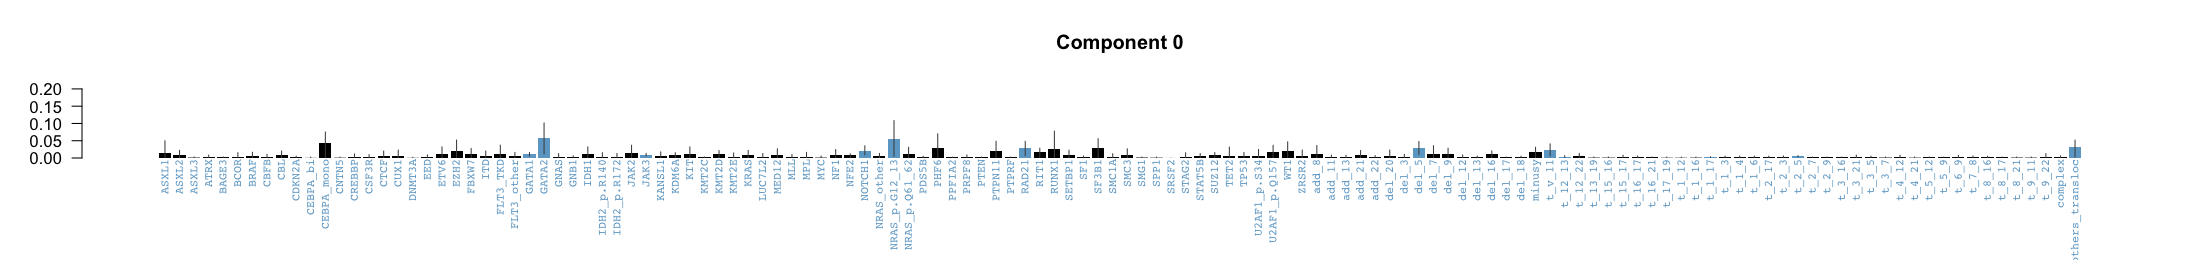

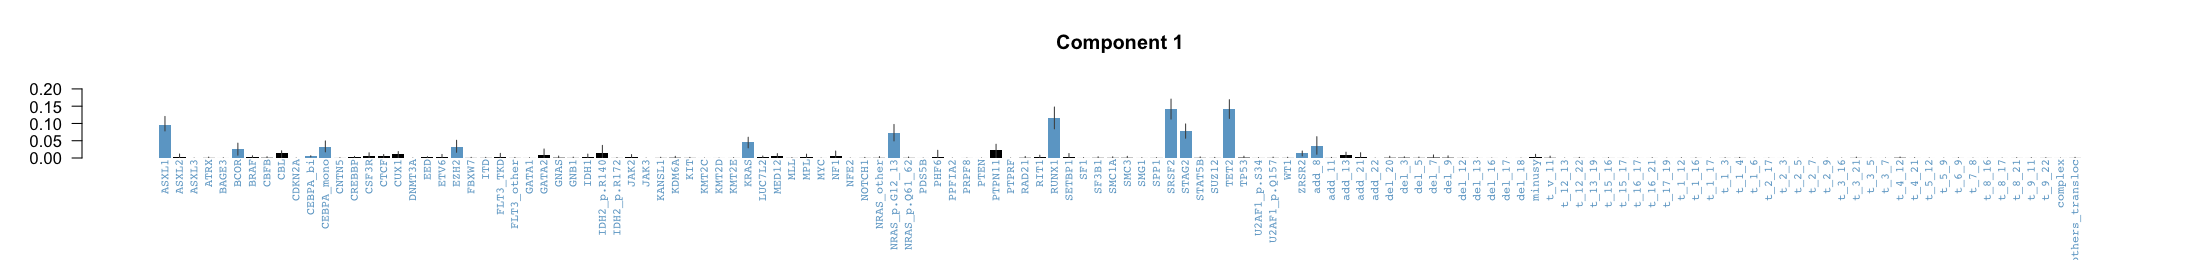

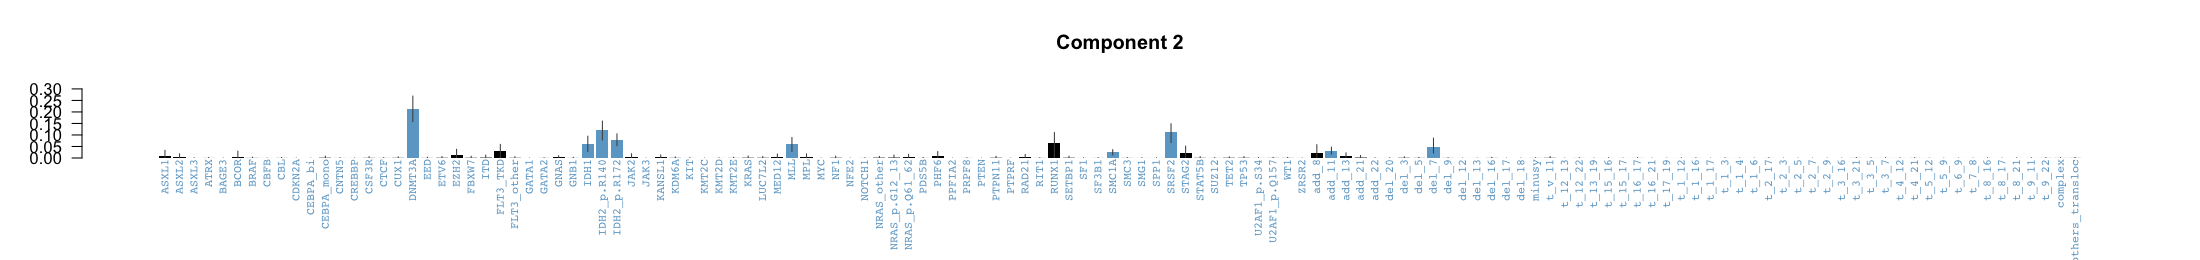

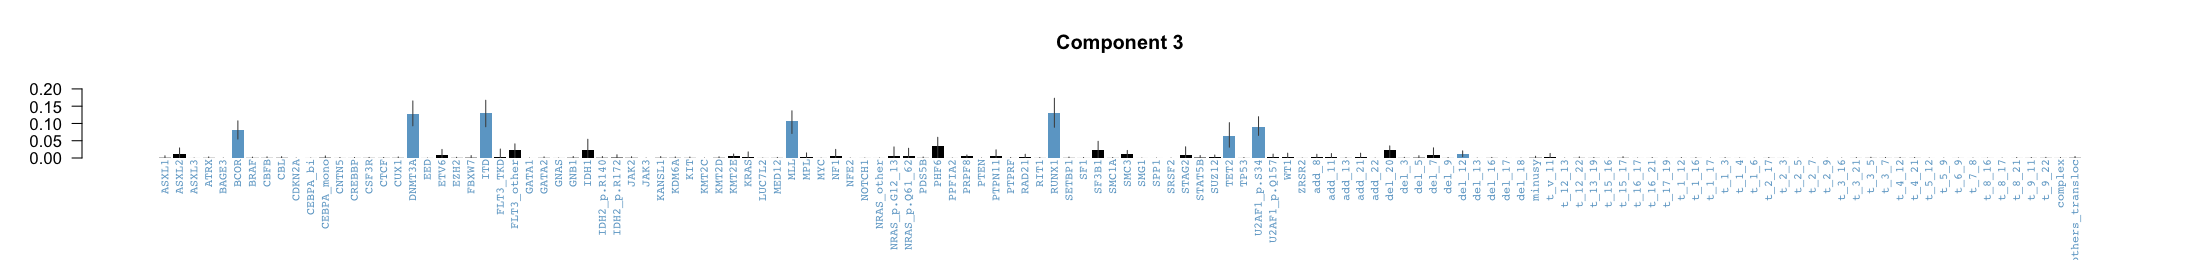

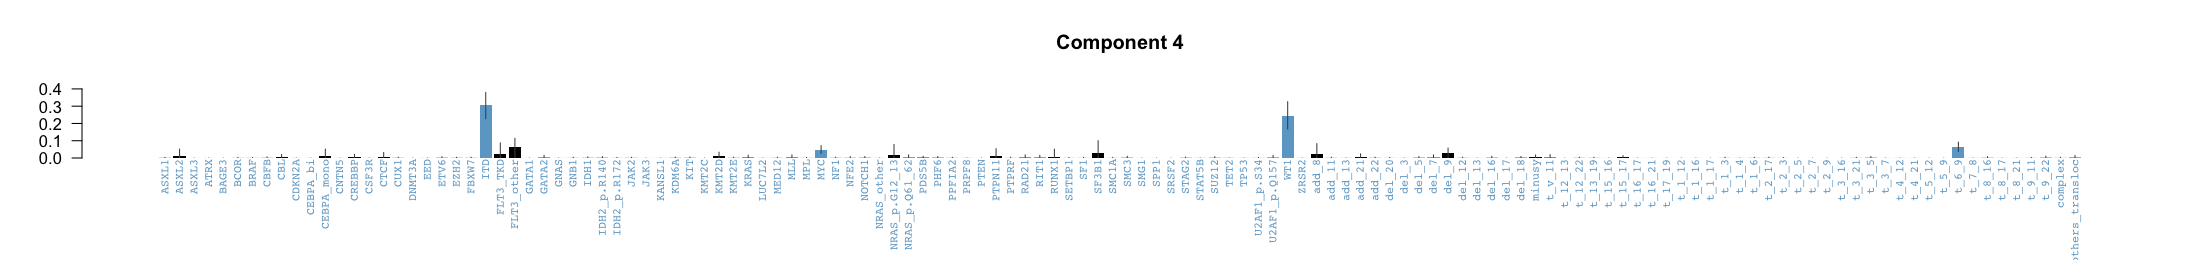

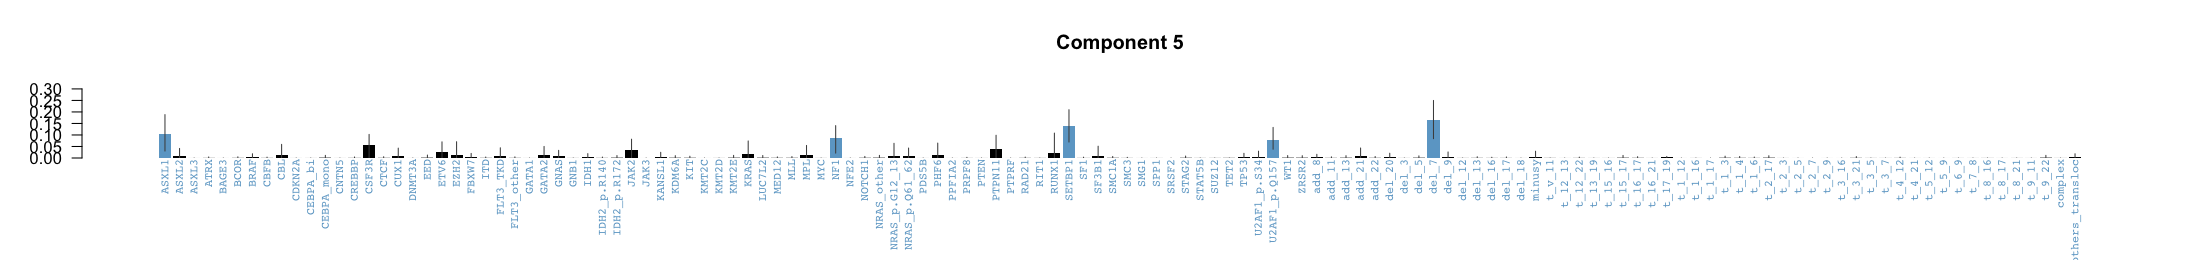

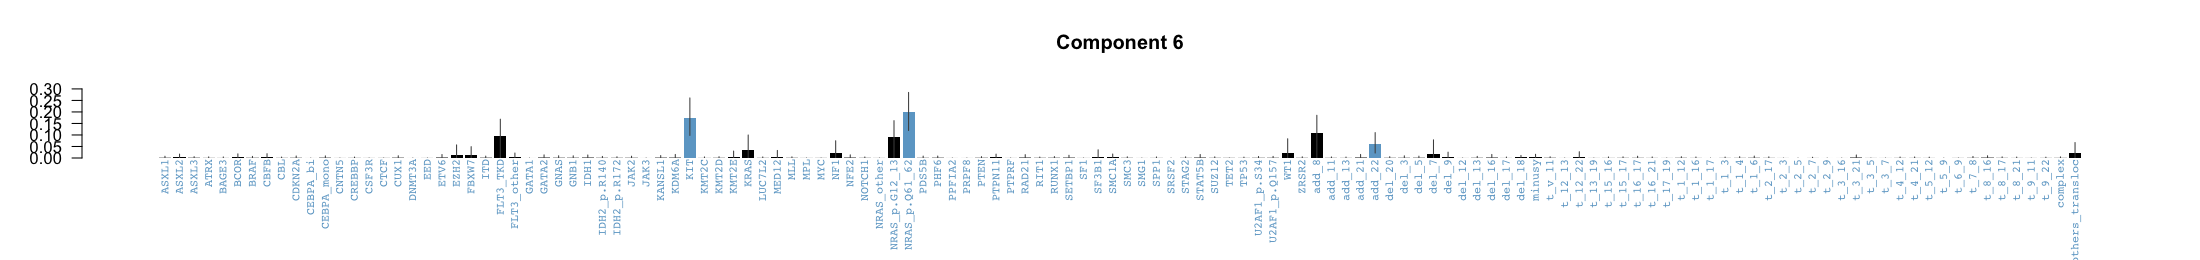

Number of components: 7
Number of NA rows   : 3


,values,count,freq
2,1,294,30.1848049281314
3,2,192,19.7125256673511
4,3,169,17.3511293634497
1,0,111,11.3963039014374
5,4,70,7.18685831622177
7,6,70,7.18685831622177
6,5,38,3.90143737166324
8,7,27,2.77207392197125
9,NaN,3,0.308008213552361
11,-- total --,974,100%


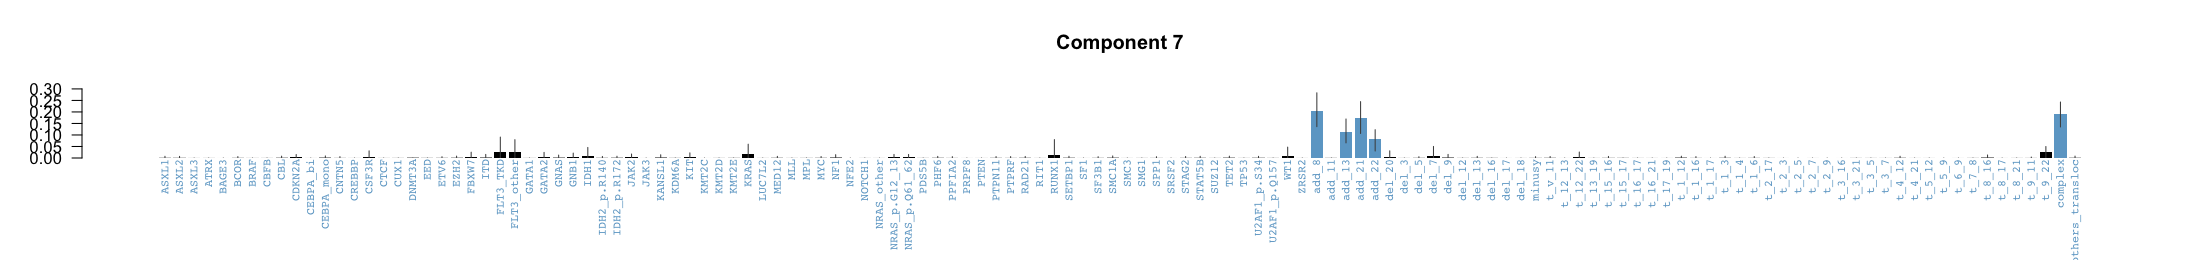

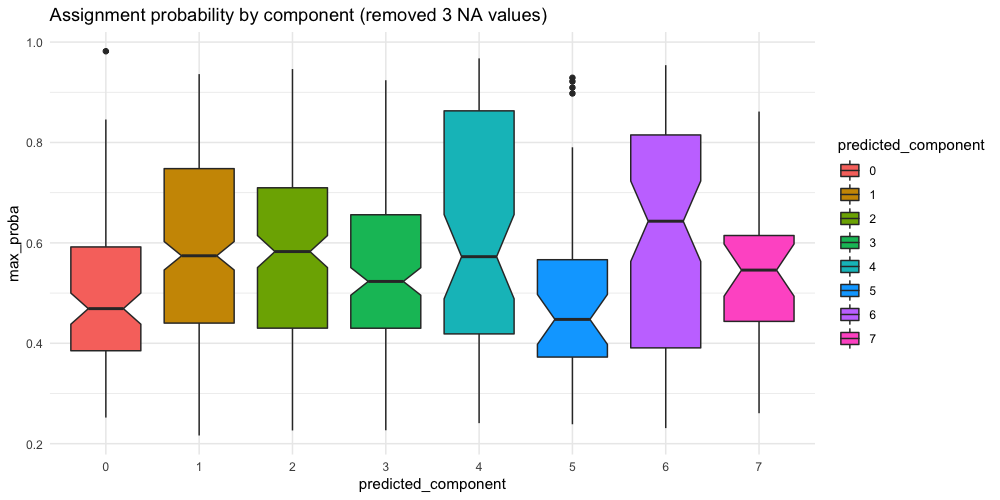

In [21]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 250
initial_clusters <- 8
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 2
ab <-2
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")
dd_predicted_recluster_7 <- get_prediction_result_dataframe(multi_output_recluster_7, df_to_recluster[colSums(df_to_recluster) > 0])
get_table(dd_predicted_recluster_7[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_recluster_7)